In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
train = pd.read_csv('../data/raw/train.csv')


In [3]:
test = pd.read_csv('../data/raw/test.csv')

In [4]:
train.head()


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [6]:
train.shape

(30471, 292)

In [7]:
test

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.00,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.20,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.50,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.80,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.00,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,38131,2016-05-26,52.20,31.8,10,12,5,1973.0,2,9.1,...,81,28,1,1,8,39,2,3,75,12
7658,38132,2016-05-28,54.09,NaN,14,0,1,NaN,2,0.0,...,1,2,1,0,0,10,0,0,0,0
7659,38133,2016-05-30,41.08,1.0,12,1,1,1.0,1,1.0,...,636,371,141,26,150,249,2,105,203,13
7660,38134,2016-05-30,34.80,19.8,8,9,5,1977.0,1,6.4,...,16,7,2,0,5,11,0,2,43,10


In [75]:
test.columns.all

<bound method Index.all of Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'cafe_count_5000_price_1500', 'cafe_count_5000_price_2500',
       'cafe_count_5000_price_4000', 'cafe_count_5000_price_high',
       'big_church_count_5000', 'church_count_5000', 'mosque_count_5000',
       'leisure_count_5000', 'sport_count_5000', 'market_count_5000'],
      dtype='object', length=291)>

In [8]:
test.shape

(7662, 291)

* RMSLE метрика (Среднеквадратичная логарифмическая ошибка) 
* посмотреть признаки статистики признаков 
* формализовать, выбрать модель, натренировать 
* кросс валидация
* предсказание на тесте и сабмит
(по предположению студента)

rmsle метрика

$$\sqrt{\sum _ {i=1} ^ {N}( \log{y_{true}} - \log{y_{pred}})^2 }$$

если применить формулу тейлора, то будет ошибка предсказания в процентах

/home/andru/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


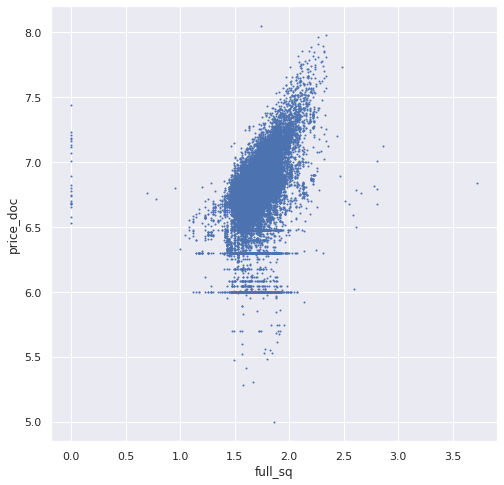

In [25]:
plt.figure(figsize=(8,8))
plt.scatter(np.log10(train['full_sq']), np.log10(train['price_doc']), s=1)
plt.xlabel("full_sq")
plt.ylabel("price_doc")
plt.show()

In [198]:
import datetime
train["dt"] = pd.to_datetime(train.timestamp)
print((datetime.datetime.now() - now).days / 28 / 4)
now = datetime.datetime.now()
series = now - train['dt']
train.q_ago = series.apply(lambda x: int(x.days / 28 / 4))

train.q_ago

0.0


0        33
1        33
2        33
3        32
4        32
         ..
30466    20
30467    20
30468    20
30469    20
30470    20
Name: q_ago, Length: 30471, dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/home/andru/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the 

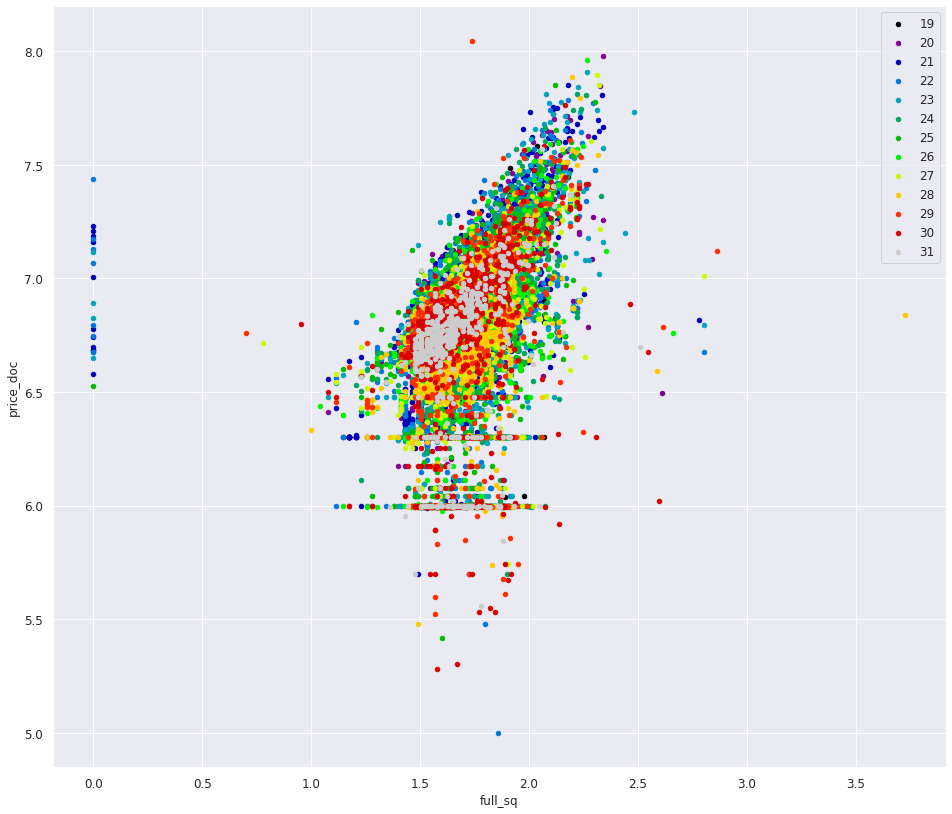

In [133]:
from scipy.spatial import ConvexHull

plt.figure(figsize=(16,14))

categories = np.unique(train['q_ago'])

lc = len(categories)
colors = [plt.cm.nipy_spectral(i/float(lc-1)) for i in range(lc)]
    
for i, category in enumerate(categories):
    subgroup = data=train.loc[train.q_ago==category, :]
    plt.scatter(np.log10(subgroup.full_sq), np.log10(subgroup.price_doc), 
                s=20, c=colors[i], label=str(category))


plt.xticks(fontsize=12); plt.yticks(fontsize=12)
#plt.scatter(np.log10(train['full_sq']), np.log10(train['price_doc']), s=1)
plt.xlabel("full_sq")
plt.ylabel("price_doc")
plt.legend(fontsize=12) 
plt.show()

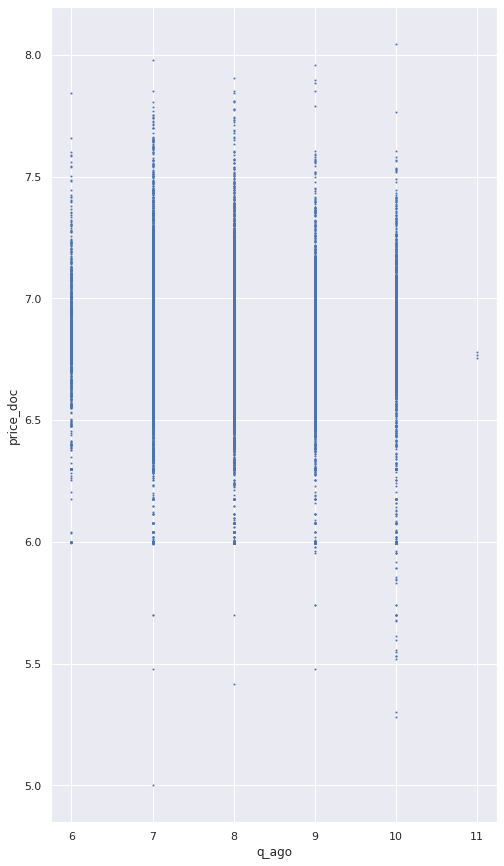

In [143]:
# почему + 1??
plt.figure(figsize=(8,15))
plt.scatter(train['q_ago'], np.log10(train['price_doc']), s=1)
plt.xlabel("q_ago")
plt.ylabel("price_doc")
plt.show()

In [34]:
# добавляем столбец, чтобы в котором записана цена за кв метр
train['price_per_m2'] = train['price_doc'] / train['full_sq']

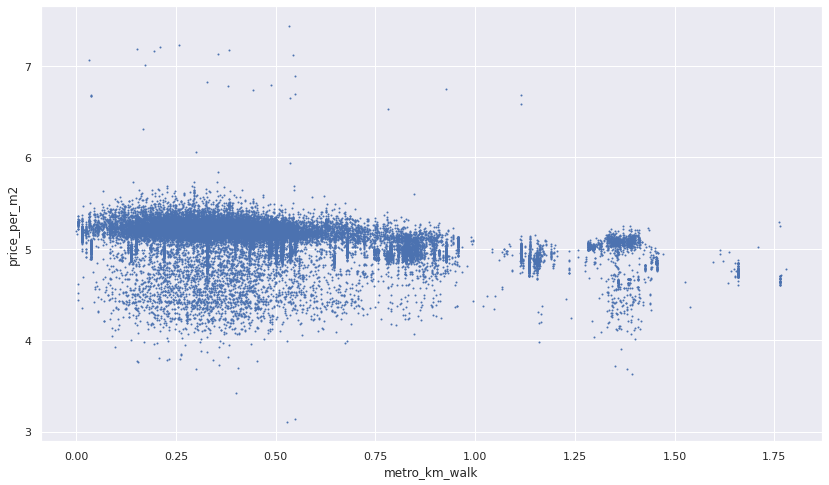

In [31]:
# почему + 1??
plt.figure(figsize=(14,8))
plt.scatter(np.log10(train['metro_km_walk'] + 1), np.log10(train['price_per_m2']), s=1)
plt.xlabel("metro_km_walk")
plt.ylabel("price_per_m2")
plt.show()

Начнем с того, чего я сама по своей неопытности не знала очень долго: столбчатые диаграммы и гистограммы — разные вещи. Основное отличие состоит в том, что гистограмма показывает частотное распределение — мы задаем набор значений оси Ox, а по Oy всегда откладывается частота. В столбчатой диаграмме (которую в англоязычной литературе уместно было бы назвать barplot) мы задаем и значения оси абсцисс, и значения оси ординат.
https://habr.com/ru/post/470535/

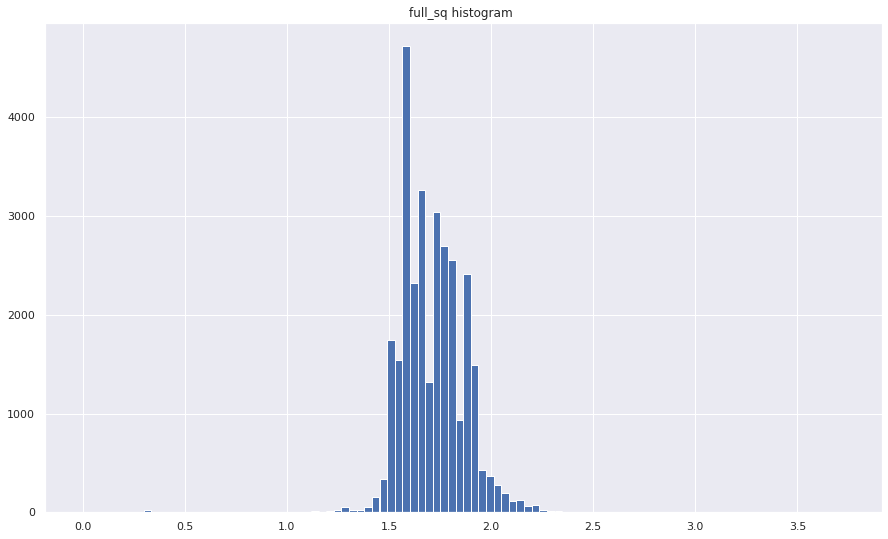

In [22]:
plt.figure(figsize=(15,9))
plt.hist(np.log10(train["full_sq"] + 1), bins=100)
plt.title('full_sq histogram ')
plt.show()

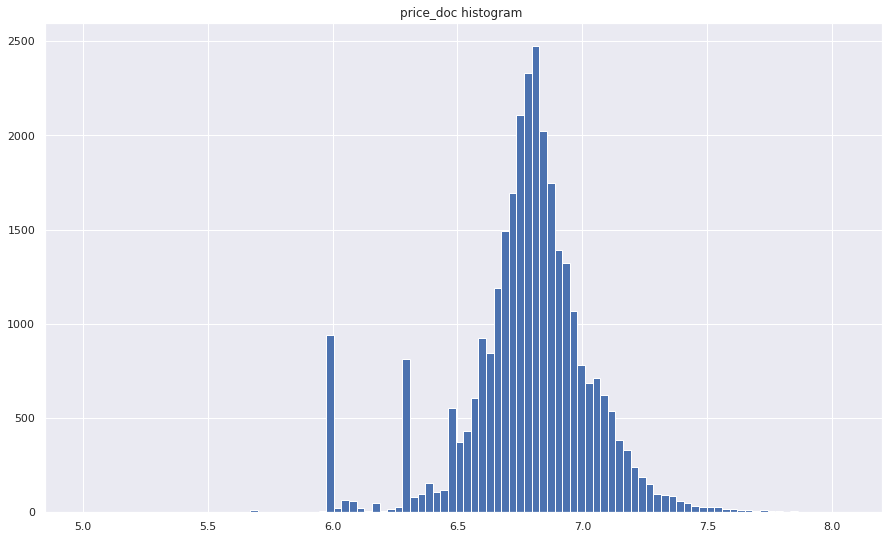

In [23]:
plt.figure(figsize=(15,9))
plt.hist(np.log10(train["price_doc"] + 1), bins=100)
plt.title('price_doc histogram ')
plt.show()

array([[<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>],
       [<AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>]], dtype=object)

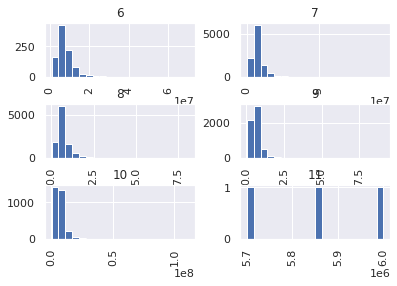

In [147]:
train.hist(column='price_doc', by='q_ago', bins=20)

q_ago
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
Name: price_doc, dtype: object

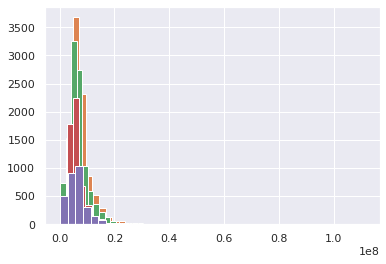

In [166]:
train.groupby(['q_ago'])['price_doc'].hist(stacked=True, bins=40)

In [24]:
# metro_km_walk
# kremlin_km
# full_sq

In [35]:
from sklearn.linear_model import SGDRegressor

In [954]:
model = SGDRegressor()

In [955]:
#features = ["metro_km_walk", "kremlin_km", "full_sq"]
# target = 'price_doc'
print(target, features)
model.fit(X=train[features].fillna(0.0), y = train[target])

price_per_m2 ['kremlin_km_0', 'kremlin_km_20', 'kremlin_km_30', 'kremlin_km_40', 'kremlin_km_50', 'leisure_count_500']


SGDRegressor()

In [956]:
test.drop(['kremlin_km_0','kremlin_km_20','kremlin_km_30','kremlin_km_40','kremlin_km_50',],axis=1)
test['kremlin_km_0'] = test['kremlin_km'].apply(lambda x: x if x < 10 else 0 )
test['kremlin_km_20'] = test['kremlin_km'].apply(lambda x: x if x >= 10 and x < 20 else 0 )
test['kremlin_km_30'] = test['kremlin_km'].apply(lambda x: x if x >= 20 and x < 30 else 0 )
test['kremlin_km_40'] = test['kremlin_km'].apply(lambda x: x if x >= 30 and x < 40 else 0 )
test['kremlin_km_50'] = test['kremlin_km'].apply(lambda x: x if x >= 40 else 0 )

test_prediction = model.predict(test[features].fillna(0))
test[target] = test_prediction

In [957]:
sample_submission = pd.read_csv("../data/raw/sample_submission.csv")

In [959]:
test['price_doc'] = test_prediction * test['full_sq']
test[['price_doc', 'price_per_m2', 'full_sq']]

,price_doc,price_per_m2,full_sq
0,3.387183e+06,86850.845801,39.00
1,7.573287e+06,95622.305996,79.20
2,5.867177e+06,144868.561241,40.50
3,5.061096e+06,80590.699772,62.80
4,3.803865e+06,95096.636555,40.00
...,...,...,...
7657,7.397110e+06,141707.079513,52.20
7658,4.021794e+06,74353.737953,54.09
7659,6.490448e+06,157995.320360,41.08
7660,4.740458e+06,136220.064006,34.80


In [960]:
sample_submission['price_doc'] = test['price_doc']
sample_submission

,id,price_doc
0,30474,3.387183e+06
1,30475,7.573287e+06
2,30476,5.867177e+06
3,30477,5.061096e+06
4,30478,3.803865e+06
...,...,...
7657,38131,7.397110e+06
7658,38132,4.021794e+06
7659,38133,6.490448e+06
7660,38134,4.740458e+06


In [961]:
sample_submission.to_csv("predict1.csv", index= False)

# cross validation

используем KFold который возвращает кортежи с выбранным разделением данных

In [187]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_squared_log_error
?KFold


In [206]:
for i in train.columns:
    print(i)

id
timestamp
full_sq
life_sq
floor
max_floor
material
build_year
num_room
kitch_sq
state
product_type
sub_area
area_m
raion_popul
green_zone_part
indust_part
children_preschool
preschool_quota
preschool_education_centers_raion
children_school
school_quota
school_education_centers_raion
school_education_centers_top_20_raion
hospital_beds_raion
healthcare_centers_raion
university_top_20_raion
sport_objects_raion
additional_education_raion
culture_objects_top_25
culture_objects_top_25_raion
shopping_centers_raion
office_raion
thermal_power_plant_raion
incineration_raion
oil_chemistry_raion
radiation_raion
railroad_terminal_raion
big_market_raion
nuclear_reactor_raion
detention_facility_raion
full_all
male_f
female_f
young_all
young_male
young_female
work_all
work_male
work_female
ekder_all
ekder_male
ekder_female
0_6_all
0_6_male
0_6_female
7_14_all
7_14_male
7_14_female
0_17_all
0_17_male
0_17_female
16_29_all
16_29_male
16_29_female
0_13_all
0_13_male
0_13_female
raion_build_count_with_

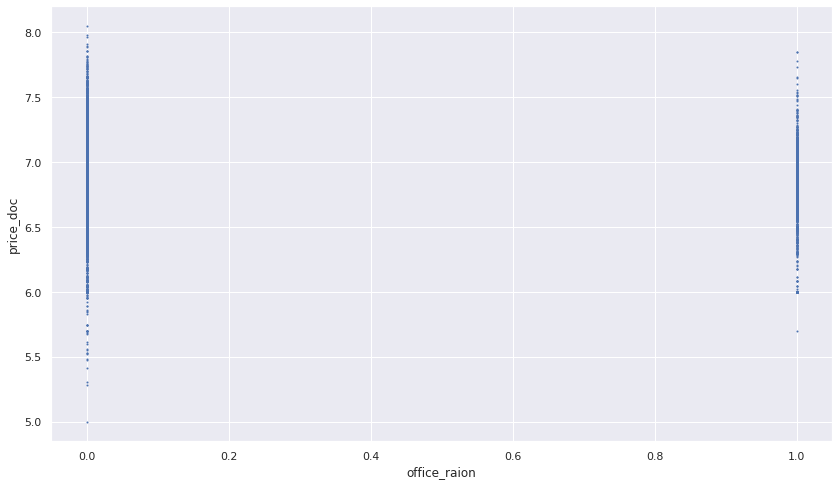

In [651]:
plt.figure(figsize=(14,8))
plt.scatter(train['floor'], np.log10(train['price_doc']), s=1)
plt.xlabel("office_raion")
plt.ylabel("price_doc")
plt.show()

In [757]:

# train['build_year_now'] = datetime.datetime.now().year - train.build_year
# train['build_year_now'] = train['build_year_now'].fillna(20)
# train['ellits_500'] = train['cafe_count_500_price_high'] + train['cafe_count_500_price_4000'] + train['green_part_500'] / 50 + train['big_church_count_500'] + train['church_count_500'] / 2 + train['mosque_count_500'] + train['sport_count_500'] / 2 + train['market_count_500'] / 3 +train['office_count_500'] / 5 +train['trc_count_500']
# train['ellits_500']
# train['kremlin_km_0'] = 
# train['kremlin_km_0'] = train['kremlin_km'].apply(lambda x: x if x < 10 else 0 )
# train['kremlin_km_20'] = train['kremlin_km'].apply(lambda x: x if x >= 10 and x < 20 else 0 )
# train['kremlin_km_30'] = train['kremlin_km'].apply(lambda x: x if x >= 20 and x < 30 else 0 )
# train['kremlin_km_40'] = train['kremlin_km'].apply(lambda x: x if x >= 30 and x < 40 else 0 )
# train['kremlin_km_50'] = train['kremlin_km'].apply(lambda x: x if x >= 40 else 0 )
# train['anti_sq'] =  train['full_sq'] / 50 / train['kremlin_km'] 
# isfirstfloor = (train['max_floor'] - train['floor']).apply(lambda x: 1 if x == 0 else 0)
# ismaxfloor = (train['max_floor'] == train['floor']).apply(lambda x: 1 if x else 0)
# train['isfirstfloor'] = isfirstfloor
# train['ismaxfloor'] = ismaxfloor
# train.drop('isfirstfloor', 1)
# train.drop('ismaxfloor', 1)
# train = train.drop(labels = ['sq50', 'new_column'], axis= 1)
train.loc[(train['kremlin_km'] < 10),'sq00'] = train['full_sq']
train.loc[(20 < train['kremlin_km']) & (train['kremlin_km'] <= 10),'sq20'] = train['full_sq']
train.loc[(30 <train['kremlin_km']) & (train['kremlin_km'] <= 20),'sq30'] = train['full_sq']
train.loc[(40 <train['kremlin_km']) & (train['kremlin_km'] <= 30),'sq40'] = train['full_sq']
train.loc[(train['kremlin_km'] >= 40),'sq50'] = train['full_sq']
train

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,kremlin_km_30,kremlin_km_40,kremlin_km_50,anti_sq,isfirstfloor,sq00,sq20,sq30,sq40,sq50
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.0,0.056742,0,NaN,NaN,NaN,NaN,NaN
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.0,0.078178,0,34.0,NaN,NaN,NaN,NaN
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.0,0.094840,0,43.0,NaN,NaN,NaN,NaN
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.0,0.091343,0,NaN,NaN,NaN,NaN,NaN
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.0,0.597207,0,77.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,46.0,2.0,6.0,...,0.000000,0.0,0.0,0.069845,0,NaN,NaN,NaN,NaN,NaN
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,86.0,4.0,10.0,...,0.000000,0.0,0.0,0.526109,0,86.0,NaN,NaN,NaN,NaN
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,21.905792,0.0,0.0,0.041085,0,NaN,NaN,NaN,NaN,NaN
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,18.0,2.0,11.0,...,0.000000,0.0,0.0,0.093962,0,NaN,NaN,NaN,NaN,NaN


In [585]:
train[['kremlin_km_0', 'kremlin_km_20', 'kremlin_km_30', 'kremlin_km_40', 'kremlin_km_50', 'anti_sq']]
# np.unique(train['product_type'])

,kremlin_km_0,kremlin_km_20,kremlin_km_30,kremlin_km_40,kremlin_km_50,anti_sq
0,0.000000,15.156211,0.000000,0.0,0.0,0.056742
1,8.698054,0.000000,0.000000,0.0,0.0,0.078178
2,9.067885,0.000000,0.000000,0.0,0.0,0.094840
3,0.000000,19.487005,0.000000,0.0,0.0,0.091343
4,2.578671,0.000000,0.000000,0.0,0.0,0.597207
...,...,...,...,...,...,...
30466,0.000000,12.599292,0.000000,0.0,0.0,0.069845
30467,3.269284,0.000000,0.000000,0.0,0.0,0.526109
30468,0.000000,0.000000,21.905792,0.0,0.0,0.041085
30469,0.000000,13.622569,0.000000,0.0,0.0,0.093962


In [836]:
train['price_per_m2'].describe()

count    3.047100e+04
mean              inf
std               NaN
min      1.289677e+03
25%      9.415516e+04
50%      1.352941e+05
75%      1.676471e+05
max               inf
Name: price_per_m2, dtype: float64

In [891]:
train.loc[train['price_per_m2'] > train['price_per_m2'].quantile(0.11)].loc[train['price_per_m2'] < train['price_per_m2'].quantile(0.99993), target].fillna(70000).sort_values().describe()

count    2.711600e+04
mean     1.514900e+05
std      2.861332e+05
min      7.068966e+04
25%      1.056593e+05
50%      1.434211e+05
75%      1.716216e+05
max      1.703520e+07
Name: price_per_m2, dtype: float64

In [909]:
# train['price_per_m2'] = train['price_per_m2'].fillna(75000).apply(lambda x: x if x < 25_000_000 else 25_000_000)
train['price_per_m2'].describe()

count    3.047100e+04
mean     1.418460e+05
std      3.673131e+05
min      1.289677e+03
25%      9.415516e+04
50%      1.352941e+05
75%      1.676471e+05
max      2.500000e+07
Name: price_per_m2, dtype: float64

In [953]:
kf = KFold(n_splits=5, shuffle=True) #random_state=42)
features = ["kremlin_km_0", 'kremlin_km_20', 'kremlin_km_30','kremlin_km_40',
            'kremlin_km_50', 'leisure_count_500']
target = "price_per_m2"#'price_per_m2'

msle_list = []
mse_list = []

for i, (train_index, val_index) in enumerate(kf.split(train)):
    train_part = train.loc[train_index, : ]
    val_part = train.loc[val_index, :]
    model = SGDRegressor()
    model.fit(X=train_part[features].fillna(0), y = train_part[target])
    
    val_predication = model.predict(val_part[features].fillna(10)).clip(0, 100000000000)
    
    mse = mean_squared_error(val_predication, val_part[target])
    msle = mean_squared_log_error(val_predication, val_part[target])
    
    pirce_mse = mean_squared_error(val_predication * val_part['full_sq'], val_part['price_doc'])
    pirce_msle = mean_squared_log_error(val_predication* val_part['full_sq'], val_part['price_doc'])
    
    print(f'Fold full {i}: msle {pirce_msle}, mse {pirce_mse}')
    msle_list.append(pirce_msle)
    mse_list.append(pirce_mse)
#     print(f'Fold {i}: msle {msle}, mse {mse}')
#     print(f'train_part.shape {train_part.shape}, val_part.shape {val_part.shape}')

print(f'MSLE average = {np.mean(msle_list)}, std = {np.std(msle_list)}')
    

Fold full 0: msle 0.29749536993139564, mse 77222967395049.23
Fold full 1: msle 0.2732257069555342, mse 11928083229508.973
Fold full 2: msle 0.2832502472831052, mse 11763426813013.451
Fold full 3: msle 0.3662605691368923, mse 9733435712529.488
Fold full 4: msle 0.2810211774621861, mse 15048503311568.404
MSLE average = 0.3002506141538227, std = 0.0339235459404964


In [205]:
#cross_val_score может сделать всё сам

# feature preprocessing (+ nans imputing)

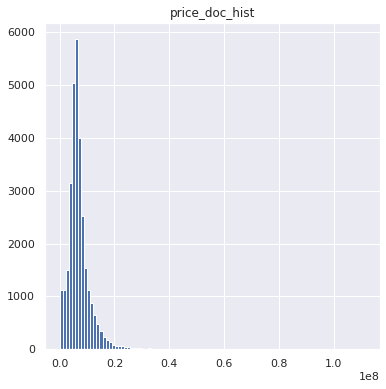

In [802]:
plt.figure(figsize=(6,6))
plt.hist(train['price_doc'], bins=100)
plt.title('price_doc_hist')
plt.show()

In [810]:
train['full_sq'].sort_values()

17932       0
24296       0
23573       1
26925       1
22722       1
         ... 
5944      634
18341     634
22785     637
2780      729
3527     5326
Name: full_sq, Length: 30471, dtype: int64

In [821]:
train['price_per_m2'].sort_values()

3527     1.289677e+03
20244    1.388889e+03
1610     2.664975e+03
1169     4.255319e+03
20388    4.788778e+03
             ...     
25887    1.616046e+07
24892    1.703520e+07
23048    2.725918e+07
17932             inf
24296             inf
Name: price_per_m2, Length: 30471, dtype: float64

In [822]:
train['price_doc'].sort_values()

20244       100000
1167        190000
1169        200000
9221        260000
3258        300000
           ...    
6319      78802248
19095     80777440
7457      91066096
28326     95122496
2118     111111112
Name: price_doc, Length: 30471, dtype: int64

In [824]:
train.loc[train['price_per_m2'] > 10000000, ['price_per_m2', 'kremlin_km']]

,price_per_m2,kremlin_km
17194,13066000.0,13.637751
17932,inf,25.595974
22412,14923206.0,4.265688
23048,27259184.0,8.804661
23228,13452318.0,8.302258
23573,11731927.0,8.315961
24296,inf,22.222434
24892,17035200.0,15.482814
25887,16160462.0,18.206690
26363,14430018.0,16.780224


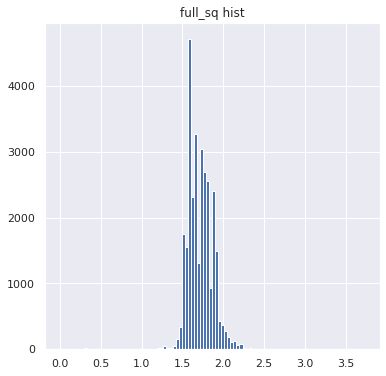

In [813]:
plt.figure(figsize=(6,6))
plt.hist(np.log10(train['full_sq'] + 1), bins=100)
plt.title('full_sq hist')
plt.show()

In [804]:
train.loc[train['price_doc'] > 20_000_000, 'price_doc']

170      37000000
297      23300000
328      20500000
441      25500000
454      20792832
           ...   
30369    26055288
30370    30630848
30397    38400000
30441    25039300
30467    25000000
Name: price_doc, Length: 541, dtype: int64

In [807]:
train.loc[(train['kremlin_km'] < 1),'kremlin_km']

313      0.072897
726      0.514619
929      0.072897
1366     0.833031
1402     0.896245
           ...   
30307    0.072897
30354    0.072897
30377    0.072897
30441    0.072897
30465    0.072897
Name: kremlin_km, Length: 619, dtype: float64

### идеи для таргета
* выкинуть большие значения
* добавить веса
* заполнить чем-нибудь

In [815]:
features = ['metro_km_walk', 'kremlin_km', 'full_sq']

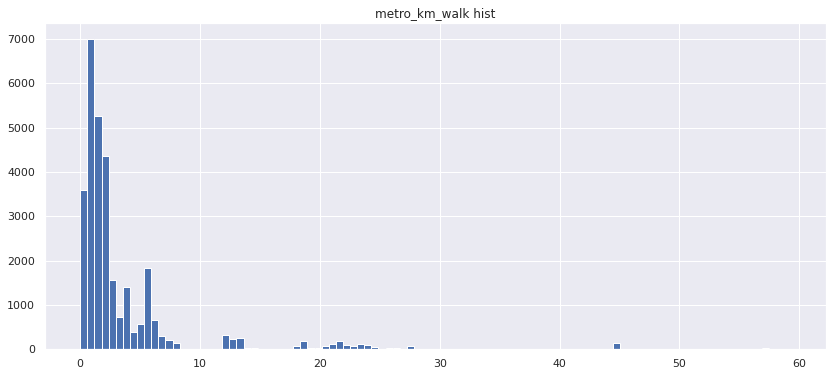

In [817]:
plt.figure(figsize=(14,6))
plt.hist(train['metro_km_walk'], bins=100)
plt.title('metro_km_walk hist')
plt.show()

# Nans
    Запонить 0
    медианной
    средним, 
    построить модель для заполнения, 
    удалить пропуски

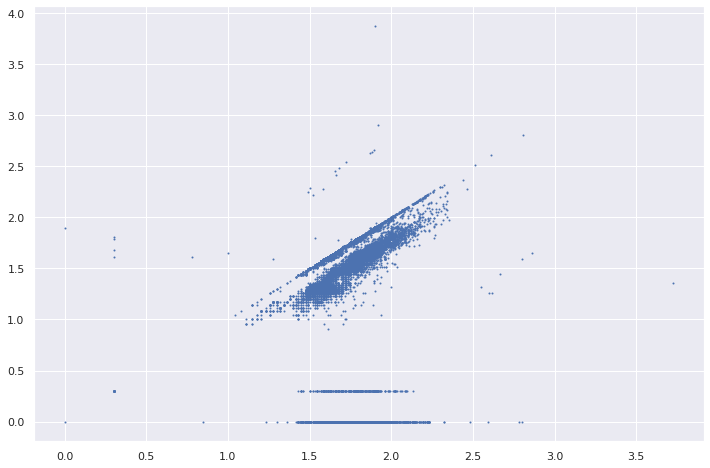

In [965]:
plt.figure(figsize=(12,8))
plt.scatter(np.log10(train['full_sq'].fillna(0) + 1), np.log10(train['life_sq'].fillna(0) + 1), s=1)

# catrgorical variables

In [967]:
train['product_type'].value_counts()

Investment       19448
OwnerOccupier    11023
Name: product_type, dtype: int64

In [969]:
train['product_type'].replace({"Investment":1, "OwnerOccupier":0})

0        1
1        1
2        1
3        1
4        1
        ..
30466    1
30467    1
30468    0
30469    1
30470    1
Name: product_type, Length: 30471, dtype: int64

In [970]:
pd.get_dummies(train['product_type'])

,Investment,OwnerOccupier
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
30466,1,0
30467,1,0
30468,0,1
30469,1,0


In [971]:
pd.get_dummies(train['school_education_centers_raion'])

,0,1,2,3,4,5,6,7,8,9,10,11,13,14
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,0,0,0,0,1,0,0,0,0,0,0,0,0,0
30467,0,0,0,0,1,0,0,0,0,0,0,0,0,0
30468,1,0,0,0,0,0,0,0,0,0,0,0,0,0
30469,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [973]:
train['sub_area'].value_counts()

Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Shhapovskoe                2
Poselenie Kievskij                   2
Poselenie Klenovskoe                 1
Poselenie Mihajlovo-Jarcevskoe       1
Name: sub_area, Length: 146, dtype: int64

In [979]:
# mean - ищет среднее, пропуская пропуски
train['sub_area'].replace(train.groupby(['sub_area'])[target].mean())

0        137143.245469
1        208515.352061
2        136615.855124
3        171841.399996
4        195158.223453
             ...      
30466    143774.752783
30467    126684.873671
30468    133651.304312
30469    162697.259135
30470    144274.961494
Name: sub_area, Length: 30471, dtype: float64

##  ДЗ (Признаки)
что-то сделать, я упустил

### Отбор признаков
* Взять все признаки и построить регрессию - самый простой и не умновый. Бустингом можно отобрать наиболее значимые.
* Градиентный бустинг - долго дорого, неинтерпритируемо
* Экспертная оценка
Используем:
* Важность признака которую получили

###   practic

In [982]:
train['price_doc'].quantile(1)

111111112.0

In [1008]:
train['price_m2'] = train['price_doc'] / (train['full_sq'] + 1)
train['price_m2'].sort_values()

3527     1.289435e+03
20244    1.369863e+03
1610     2.658228e+03
1169     4.166667e+03
20388    4.713953e+03
             ...     
27154    7.659480e+06
25887    8.080231e+06
24296    8.167508e+06
24892    8.517600e+06
23048    1.362959e+07
Name: price_m2, Length: 30471, dtype: float64

In [1009]:
train['price_m2'].clip(train['price_m2'].quantile(0.001), train['price_m2'].quantile(0.999),
                        inplace=True)
train['price_m2'].sort_values()

364        9259.259259
634        9259.259259
5459       9259.259259
14384      9259.259259
20244      9259.259259
             ...      
17932    536319.766358
24627    536319.766358
17194    536319.766358
6112     536319.766358
25887    536319.766358
Name: price_m2, Length: 30471, dtype: float64

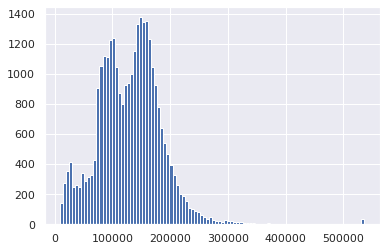

In [1010]:
plt.hist(train['price_m2'], bins=100)
plt.show()

In [1012]:
sub_area_target_encoding = train.groupby(['sub_area'])['price_m2'].mean()

In [1013]:
train['sub_area'] = train['sub_area'].replace(sub_area_target_encoding)

In [1015]:
test['sub_area'] = test['sub_area'].replace(sub_area_target_encoding)

In [1036]:
def get_date_time_features(timestamp_series: pd.Series) -> pd.DataFrame:
    output = pd.DataFrame()
    output['timestamp']=timestamp_series
    output['month']=timestamp_series.dt.month.astype(np.int8)
#     output['hour_datetime']=timestamp_series.dt.hour.astype(np.int8)
    output['day_week']=timestamp_series.dt.dayofweek.astype(np.int8)
    output['day_month_datetime']=timestamp_series.dt.day.astype(np.int8)
    output['year']=timestamp_series.dt.year.astype(np.int16)
    return output
    

In [1042]:
# get_date_time_features(train['timestamp'])
train['dt']


0       2011-08-20
1       2011-08-23
2       2011-08-27
3       2011-09-01
4       2011-09-05
           ...    
30466   2015-06-30
30467   2015-06-30
30468   2015-06-30
30469   2015-06-30
30470   2015-06-30
Name: dt, Length: 30471, dtype: datetime64[ns]

In [1043]:
# График кросс валидации от лидерборда